In [24]:
# Task : utilize a dataset on electricity consumption and train a regression model to forecast future consumption

# import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from google.colab import files

In [25]:
# upload data set
uploader = files.upload()

# Content

# The data consists of 52,416 observations of energy consumption on a 10-minute
  # window. Every observation is described by 9 feature columns.

#    1. Date Time: Time window of ten minutes.
#    2. Temperature: Weather Temperature.
#    3. Humidity: Weather Humidity.
#    4. Wind Speed: Wind Speed.
#    5. General Diffuse Flows: “Diffuse flow” is a catchall term to describe
#       low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through
#       sulfide mounds, fractured lava flows, and assemblages of bacterial
#       mats and macrofauna.
#    6. Diffuse Flows
#    7. Zone 1 Power Consumption
#    8. Zone 2 Power Consumption
#    9. Zone 3 Power Consumption


Saving powerconsumption.csv to powerconsumption (1).csv


In [41]:
# get pandas data frame data set
df = pd.read_csv(open('powerconsumption.csv', 'rb'))
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [42]:
# Get mean power consumption from three power zones
df['PowerConsumption'] = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean(axis = 1)
df = df.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis = 1)

In [43]:
# Reducing the number of entries
# Get average value for each parameter evry hour
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.resample('H', on = 'Datetime').mean().reset_index()
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,22158.923532
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,19259.508737
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,17363.293880
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,16304.815849
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,15904.879449


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'GeneralDiffuseFlows'}>],
       [<Axes: title={'center': 'DiffuseFlows'}>,
        <Axes: title={'center': 'PowerConsumption'}>]], dtype=object)

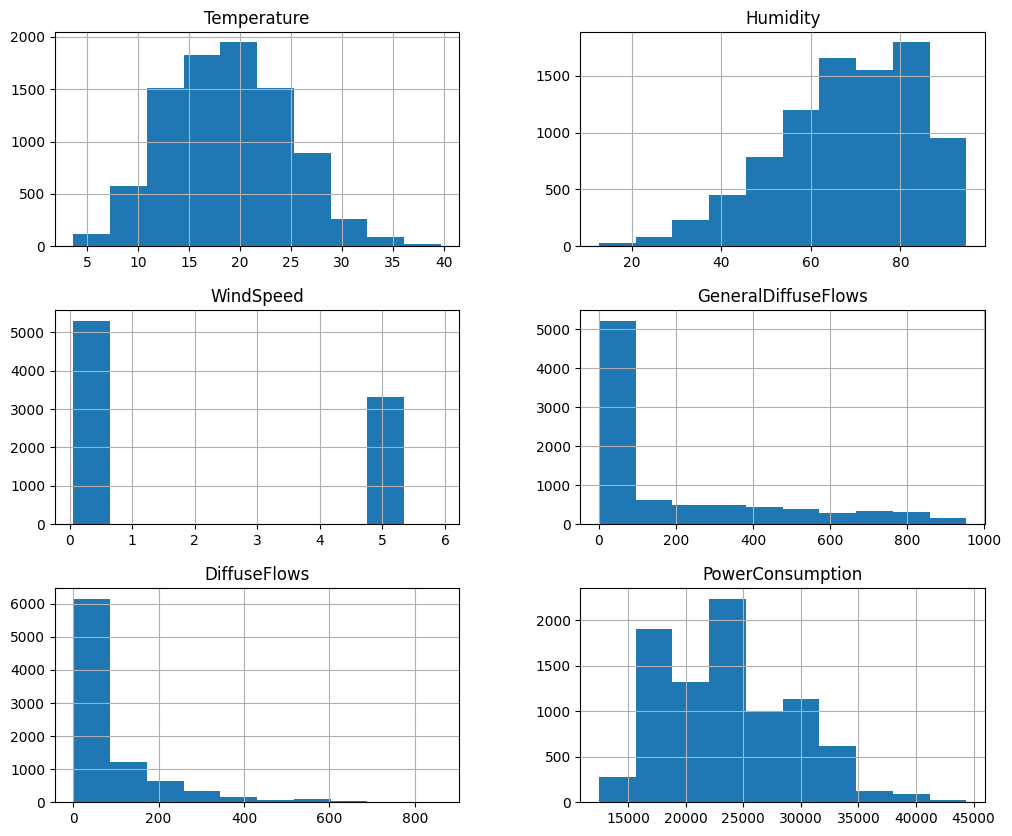

In [44]:
# Data histogram visualization
df.drop('Datetime', axis = 1).hist(figsize = (12, 10))

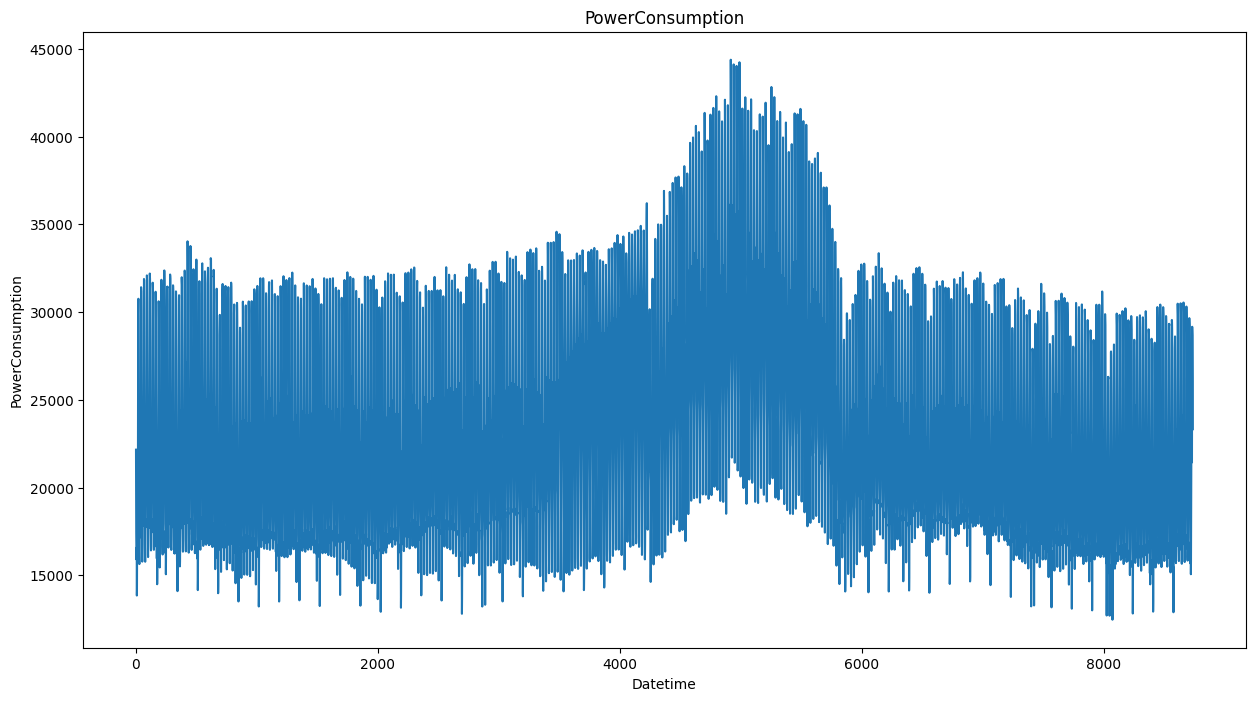

In [45]:
plt.figure(figsize = (15, 8))
plt.plot(df.index, df['PowerConsumption'], label = 'PowerConsumption')
plt.title('PowerConsumption')
plt.xlabel('Datetime')
plt.ylabel('PowerConsumption')
plt.show()

In [46]:
# Include date time as feature
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

X = df.drop('PowerConsumption', axis = 1)
y = df['PowerConsumption']

# Split data into test & train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.drop('Datetime', axis = 1))
X_test = scaler.transform(X_test.drop('Datetime', axis = 1))

metrics = pd.DataFrame(columns = ['Model', 'MSE', 'R2-score'])

Mean Squared Error (MSE): 15391495.479748549
R-squared (R2): 0.5160775319191118


<ipython-input-47-2dc4498667c5>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(data, ignore_index = True)


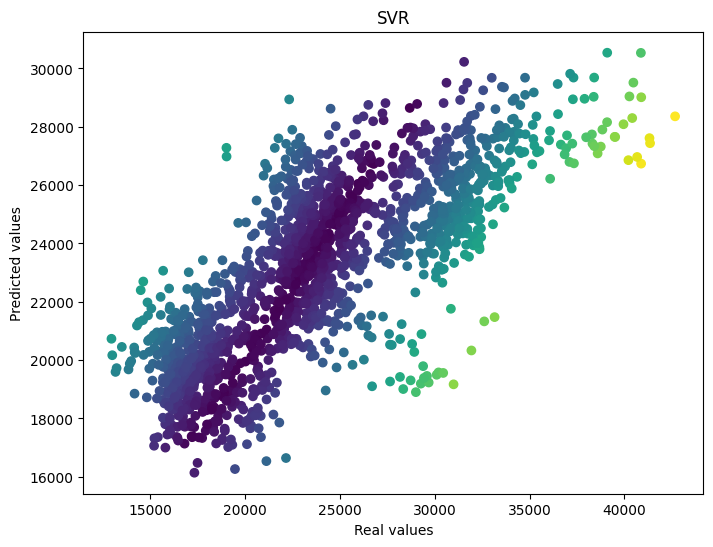

In [47]:
from sklearn.svm import SVR

# Try SVR with linear kernal
model = SVR(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Get metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

data = pd.DataFrame({
    'Model' : ['SVR'],
    'MSE' : [mse],
    'R2-score' : [r2]
})

metrics = metrics.append(data, ignore_index = True)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, c = np.abs(y_pred - y_test), cmap = 'viridis')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("SVR")
plt.show()

Mean Squared Error (MSE): 11894368.230302365
R-squared (R2): 0.6260303595680968


<ipython-input-48-52ab02737578>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(data, ignore_index = True)


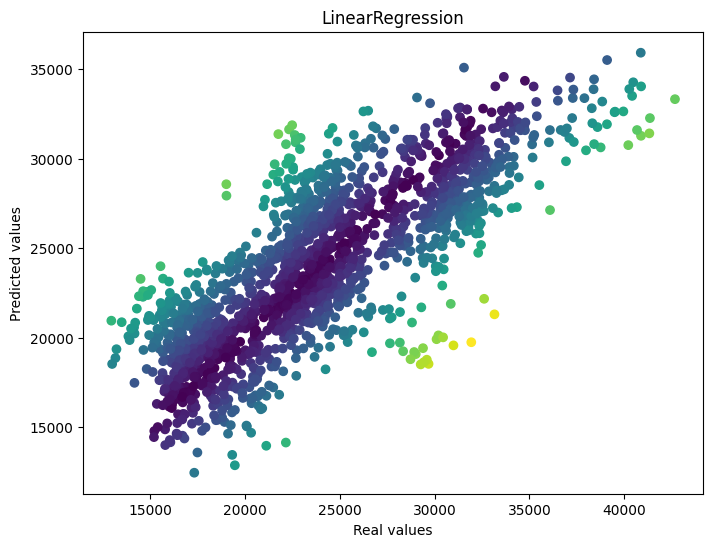

In [48]:
from sklearn.linear_model import LinearRegression

# Try linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Get metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

data = pd.DataFrame({
    'Model' : ['LinearRegression'],
    'MSE' : [mse],
    'R2-score' : [r2]
})

metrics = metrics.append(data, ignore_index = True)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, c = np.abs(y_pred - y_test), cmap = 'viridis')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("LinearRegression")
plt.show()

Mean Squared Error (MSE): 11894328.347354753
R-squared (R2): 0.6260316135238588


<ipython-input-49-f030a631bccf>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(data, ignore_index = True)


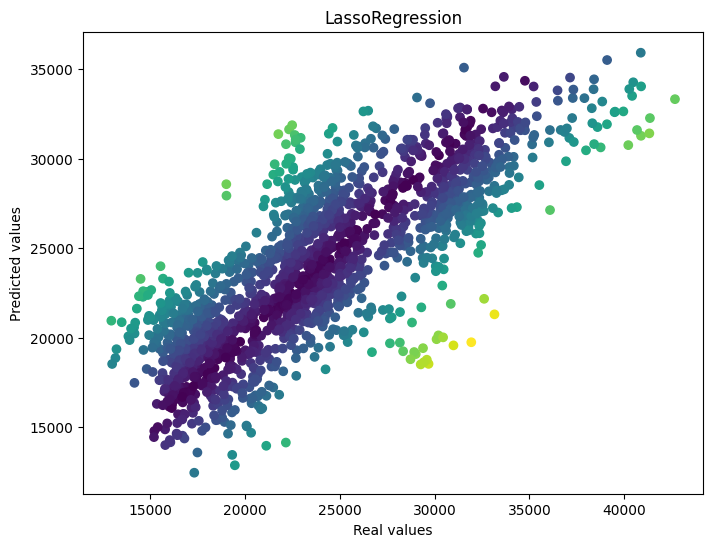

In [49]:
from sklearn.linear_model import Lasso

# Try lasso regression
model = Lasso(alpha = 0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Get metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

data = pd.DataFrame({
    'Model' : ['LassoRegression'],
    'MSE' : [mse],
    'R2-score' : [r2]
})

metrics = metrics.append(data, ignore_index = True)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, c = np.abs(y_pred - y_test), cmap = 'viridis')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("LassoRegression")
plt.show()

Mean Squared Error (MSE): 4296204.269005129
R-squared (R2): 0.8649234717982989
[1.87022749e-01 5.34118889e-04 8.60101253e-04 5.14579548e-03
 4.05500519e-05 7.63013079e-01 3.93995422e-04 4.29896114e-02]


<ipython-input-50-257401098277>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(data, ignore_index = True)


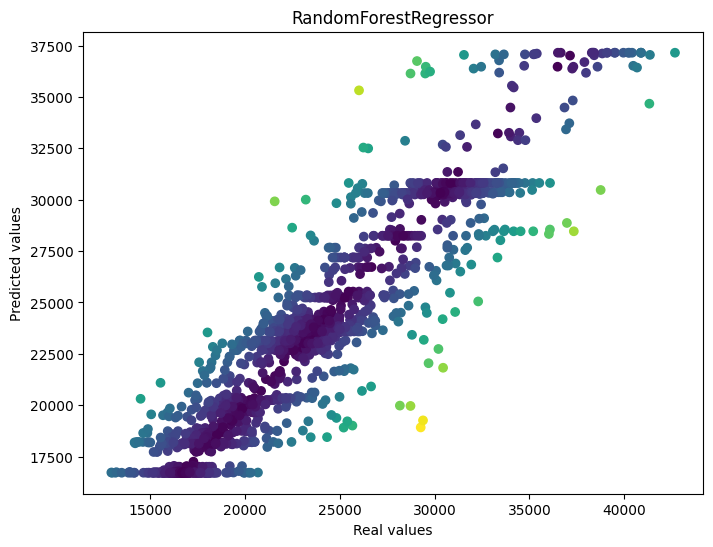

In [50]:
from sklearn.ensemble import RandomForestRegressor

#Try random forest regressor
model = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Get metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

print(model.feature_importances_)

data = pd.DataFrame({
    'Model' : ['RandomForestRegressor'],
    'MSE' : [mse],
    'R2-score' : [r2]
})

metrics = metrics.append(data, ignore_index = True)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, c = np.abs(y_pred - y_test), cmap = 'viridis')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("RandomForestRegressor")
plt.show()

Mean Squared Error (MSE): 1386183.5491956903
R-squared (R2): 0.9564171418415761
[0.17638365 0.00333232 0.01291361 0.0209655  0.00463516 0.69700482
 0.00899257 0.07577237]


<ipython-input-51-efbe68a62346>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(data, ignore_index = True)


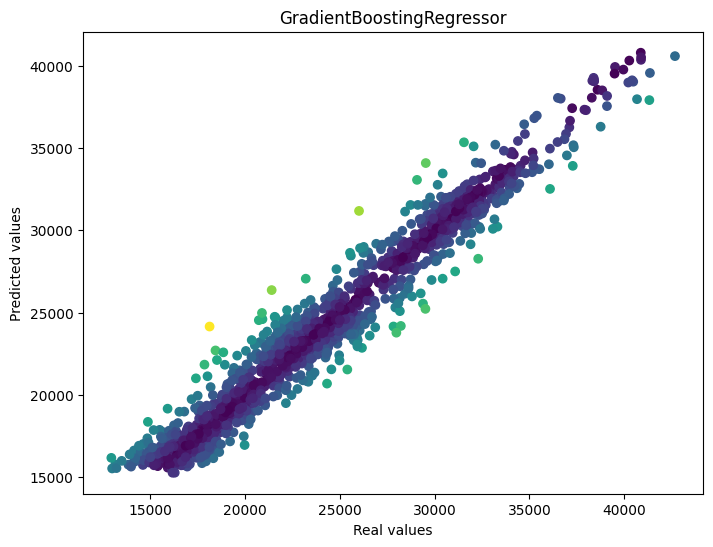

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Try gradient boosting regressor
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Get metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

print(model.feature_importances_)

data = pd.DataFrame({
    'Model' : ['GradientBoostingRegressor'],
    'MSE' : [mse],
    'R2-score' : [r2]
})

metrics = metrics.append(data, ignore_index = True)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, c = np.abs(y_pred - y_test), cmap = 'viridis')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("GradientBoostingRegressor")
plt.show()

Mean Squared Error (MSE): 4693918.417173311
R-squared (R2): 0.8524189810926706
[0.12205193 0.00547465 0.04853141 0.03932984 0.01273875 0.59332994
 0.03073892 0.14780455]


<ipython-input-52-60d12f09cb9d>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(data, ignore_index = True)


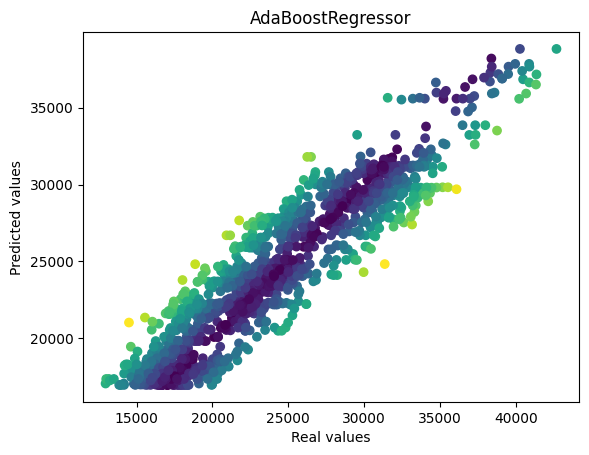

In [52]:
from sklearn.ensemble import AdaBoostRegressor

# Try ada boost regressor
model = AdaBoostRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Get metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

print(model.feature_importances_)

data = pd.DataFrame({
    'Model' : ['AdaBoostRegressor'],
    'MSE' : [mse],
    'R2-score' : [r2]
})

metrics = metrics.append(data, ignore_index = True)

plt.scatter(y_test, y_pred, c = np.abs(y_pred - y_test), cmap = 'viridis')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("AdaBoostRegressor")
plt.show()

Mean Squared Error (MSE): 2528397.8550594137
R-squared (R2): 0.9205048962317751
[0.15914645 0.0087283  0.01145166 0.01736139 0.00846351 0.68893181
 0.01898252 0.08693437]


<ipython-input-53-49a5bd6b69ae>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(data, ignore_index = True)


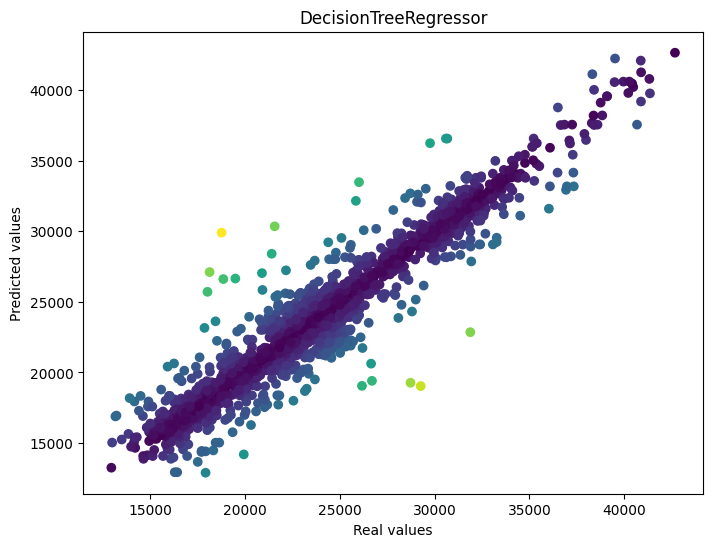

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Try SVR with linear kernal
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Get metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

print(model.feature_importances_)

data = pd.DataFrame({
    'Model' : ['DecisionTreeRegressor'],
    'MSE' : [mse],
    'R2-score' : [r2]
})

metrics = metrics.append(data, ignore_index = True)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, c = np.abs(y_pred - y_test), cmap = 'viridis')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("DecisionTreeRegressor")
plt.show()

In [54]:
print(metrics)

                       Model           MSE  R2-score
0                        SVR  1.539150e+07  0.516078
1           LinearRegression  1.189437e+07  0.626030
2            LassoRegression  1.189433e+07  0.626032
3      RandomForestRegressor  4.296204e+06  0.864923
4  GradientBoostingRegressor  1.386184e+06  0.956417
5          AdaBoostRegressor  4.693918e+06  0.852419
6      DecisionTreeRegressor  2.528398e+06  0.920505
